# 1

In [39]:
def identifypattern(seq):
    differences = []
    for i in range(1, len(seq)):
        difference = seq[i] - seq[i-1]  
        differences.append(difference)
    
    ratios = []
    for i in range(1, len(seq)):
        if seq[i-1] != 0: 
            ratio = seq[i] / seq[i-1]  
            ratios.append(ratio)
    
    is_arithmetic = True
    for diff in differences:
        if diff != differences[0]:  
            is_arithmetic = False
            break

    
    is_geometric = True
    for ratio in ratios:
        if ratio != ratios[0]:  
            is_geometric = False
            break

    is_fibonacci = True
    for i in range(2, len(seq)):  
        if seq[i] != seq[i-1] + seq[i-2]:  
            is_fibonacci = False
            break

    if is_arithmetic:
        return f"Arithmetic Sequence with common difference {differences[0]}"
    elif is_geometric:
        return f"Geometric Sequence with common ratio {ratios[0]}"
    elif is_fibonacci:
        return "Fibonacci Sequence"
    else:
        return "No simple pattern found"
sequences = {
    "Sequence 1": [2, 4, 6, 8, 10],       
    "Sequence 2": [3, 6, 12, 24, 48],    
    "Sequence 3": [1, 1, 2, 3, 5, 8],   
    "Sequence 4": [10, 20, 30, 55, 70],  
    "Sequence 5": [100, 50, 25, 12.5, 6.25],  
}

for name, seq in sequences.items():
    print(f"{name}: {identifypattern(seq)}")
    print("\n\n")



results = []
for name, seq in sequences.items():
    differences = [seq[i] - seq[i-1] for i in range(1, len(seq))]
    ratios = [seq[i] / seq[i-1] for i in range(1, len(seq)) if seq[i-1] != 0]
    analysis_result = identifypattern(seq)
    results.append(f"{name}:Differences: {differences} | Ratios: {ratios}")

for result in results:
    print(result)

Sequence 1: Arithmetic Sequence with common difference 2



Sequence 2: Geometric Sequence with common ratio 2.0



Sequence 3: Fibonacci Sequence



Sequence 4: No simple pattern found



Sequence 5: Geometric Sequence with common ratio 0.5



Sequence 1:Differences: [2, 2, 2, 2] | Ratios: [2.0, 1.5, 1.3333333333333333, 1.25]
Sequence 2:Differences: [3, 6, 12, 24] | Ratios: [2.0, 2.0, 2.0, 2.0]
Sequence 3:Differences: [0, 1, 1, 2, 3] | Ratios: [1.0, 2.0, 1.5, 1.6666666666666667, 1.6]
Sequence 4:Differences: [10, 10, 25, 15] | Ratios: [2.0, 1.5, 1.8333333333333333, 1.2727272727272727]
Sequence 5:Differences: [-50, -25, -12.5, -6.25] | Ratios: [0.5, 0.5, 0.5, 0.5]


# 2

In [49]:
import pandas as pd
import re
from collections import Counter, defaultdict
from nltk import ngrams
import PyPDF2  

def extractfrompdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + " "
    return text

def analyzetext(text, source_name):
    words = re.findall(r'\b\w+\b', text.lower())

    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)

    bigrams = ngrams(words, 2)
    trigrams = ngrams(words, 3)
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)
    most_common_bigrams = bigram_counts.most_common(10)
    most_common_trigrams = trigram_counts.most_common(10)

    palindromes = [word for word in set(words) if word == word[::-1] and len(word) > 1]

    anagrams = defaultdict(list)
    for word in set(words):
        sorted_word = ''.join(sorted(word))
        anagrams[sorted_word].append(word)
    anagram_pairs = {key: value for key, value in anagrams.items() if len(value) > 1}

    def find_rhymes(word, word_list):
        return [w for w in word_list if w.endswith(word[-2:]) and w != word]

    rhymes = {word: find_rhymes(word, set(words)) for word in set(words)}

    with open(f'{source_name}_analysis_results.txt', 'w', encoding='utf-8') as f: 
        f.write(f"=== Analysis Results for {source_name} ===\n\n")
        
        f.write("1. Most Common Words:\n")
        for word, count in most_common_words:
            f.write(f"   - {word}: {count}\n")
        
        f.write("\n2. Most Common Bigrams:\n")
        for bigram, count in most_common_bigrams[:5]: 
            f.write(f"   - {bigram}: {count}\n")
        
        f.write("\n3. Most Common Trigrams:\n")
        for trigram, count in most_common_trigrams[:5]:  
            f.write(f"   - {trigram}: {count}\n")
        
        f.write("\n4. Palindrome Words:\n")
        f.write(f"   - {palindromes[:10] if palindromes else 'None'}\n") 
        
        f.write("\n5. Anagram Pairs:\n")
        if anagram_pairs:
            for key, value in list(anagram_pairs.items())[:5]:  
                f.write(f"   - {key}: {value}\n")
        else:
            f.write("   - None\n")
        
        f.write("\n6. Rhyming Words:\n")
        for word, rhyme_list in list(rhymes.items())[:5]:  
            f.write(f"   - {word}: {rhyme_list if rhyme_list else 'None'}\n")

df = pd.read_csv('2025sem2/textdata.csv')

csv_text = ' '.join(df['Sentence'].tolist())
analyze_text(csv_text, "CSV")

pdf1_text = extractfrompdf(r"C:\Users\acer\Downloads\legacy.pdf")
pdf2_text = extractfrompdf(r"C:\Users\acer\Downloads\Ethics_of_Artificial_Intelligence-2 (1).pdf")

analyzetext(pdf1_text, "PDF1")
analyzetext(pdf2_text, "PDF2")

print("Analysis results have been saved to separate files for each input source.")

Analysis results have been saved to separate files for each input source.


In [5]:
# 3

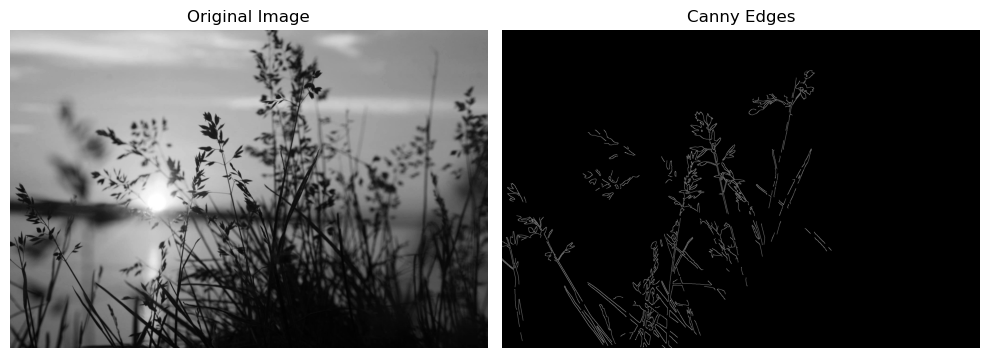

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r'C:\Users\acer\OneDrive\Pictures\sunset.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Blur for noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Canny edge detection
lower_threshold = 100  # Adjust as necessary
upper_threshold = 200   # Adjust as necessary
edges = cv2.Canny(blurred_image, lower_threshold, upper_threshold)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# 4

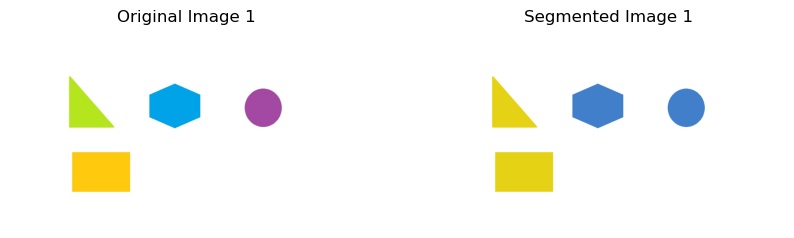

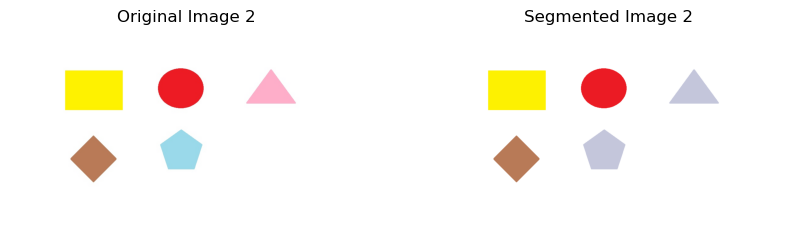

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kmeans_color_segmentation(image, k=5):
    # Reshape the image to be a list of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # dominant color ena kanikum
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to uint8 and reshape to original image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image

def display_images(original, segmented, title1, title2):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

# Load the images
image1 = cv2.imread(r"C:\Users\acer\Downloads\a2.jpg")  
image2 = cv2.imread(r"C:\Users\acer\Downloads\a1.jpg")  

# Perform K-means clustering
segmented_image1 = kmeans_color_segmentation(image1, k=3)
segmented_image2 = kmeans_color_segmentation(image2, k=5)

# Display the original and segmented images
display_images(image1, segmented_image1, 'Original Image 1', 'Segmented Image 1')
display_images(image2, segmented_image2, 'Original Image 2', 'Segmented Image 2')

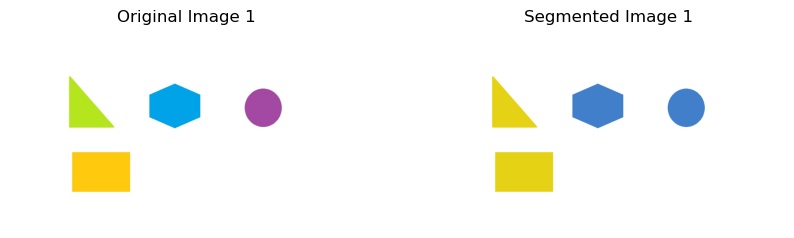

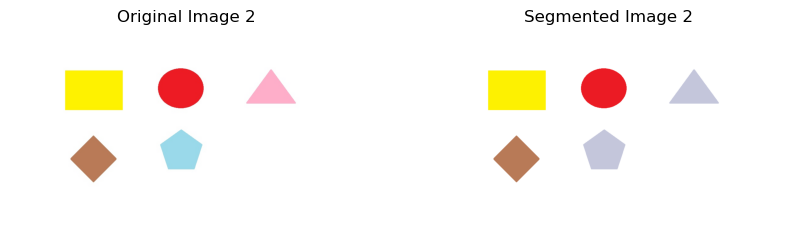

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kmeans_color_segmentation(image, k=5):
    # Reshape the image to be a list of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to uint8 and reshape to original image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image, labels.reshape(image.shape[:2])

def display_images(original, segmented, title1, title2):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

def display_shapes(segmented_image, labels):
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        if label == 0:  # Skip the background if necessary
            continue
        
        # Create a mask for the current label
        mask = np.zeros_like(segmented_image)
        mask[labels == label] = segmented_image[labels == label]
        
        # Display the shape
        cv2.imshow(f'Shape {label}', mask)

# Load the images
image1 = cv2.imread(r"C:\Users\acer\Downloads\a2.jpg")  
image2 = cv2.imread(r"C:\Users\acer\Downloads\a1.jpg")  

# Perform K-means clustering
segmented_image1, labels1 = kmeans_color_segmentation(image1, k=3)
segmented_image2, labels2 = kmeans_color_segmentation(image2, k=5)

# Display the original and segmented images
display_images(image1, segmented_image1, 'Original Image 1', 'Segmented Image 1')
display_images(image2, segmented_image2, 'Original Image 2', 'Segmented Image 2')

# Display each shape separately
display_shapes(segmented_image1, labels1)
display_shapes(segmented_image2, labels2)

# Wait for a key press and close the image windows
cv2.waitKey(0)
cv2.destroyAllWindows()

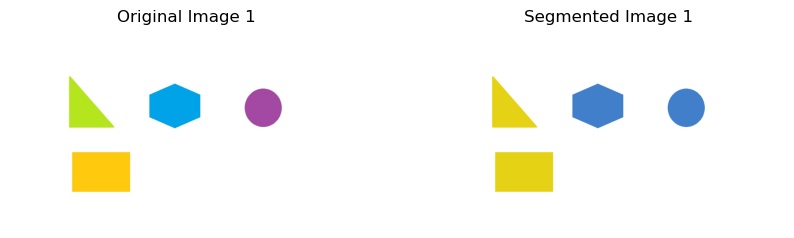

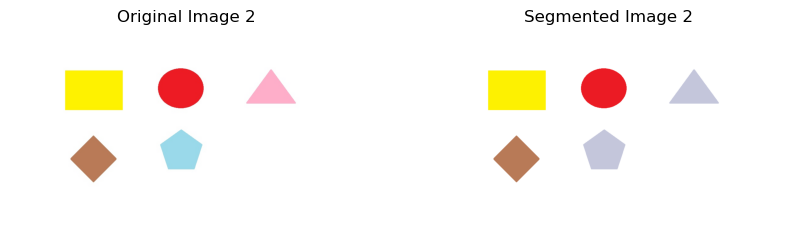

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def kmeans_color_segmentation(image, k=5):
    # Reshape the image to be a list of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back to uint8 and reshape to original image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    return segmented_image, labels.reshape(image.shape[:2])

def display_images(original, segmented, title1, title2):
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

def display_shapes(segmented_image, labels):
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        if label == 0:  # Skip the background if necessary
            continue
        
        # Create a mask for the current label
        mask = np.zeros_like(segmented_image)
        mask[labels == label] = segmented_image[labels == label]
        
        # Display the shape
        cv2.imshow(f'Shape {label}', mask)

# Load the images
image1 = cv2.imread(r"C:\Users\acer\Downloads\a2.jpg")  
image2 = cv2.imread(r"C:\Users\acer\Downloads\a1.jpg")  

# Check if images are loaded
if image1 is None:
    print("Error: Image 1 not found.")
if image2 is None:
    print("Error: Image 2 not found.")

# Perform K-means clustering
segmented_image1, labels1 = kmeans_color_segmentation(image1, k=3)
segmented_image2, labels2 = kmeans_color_segmentation(image2, k=5)

# Display the original and segmented images
display_images(image1, segmented_image1, 'Original Image 1', 'Segmented Image 1')
display_images(image2, segmented_image2, 'Original Image 2', 'Segmented Image 2')

# Display each shape separately
display_shapes(segmented_image1, labels1)
display_shapes(segmented_image2, labels2)

# Wait for a key press and close the image windows
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from matplotlib import pyplot as plt
bags_hsv = rgb2hsv(bags)
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(bags_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(bags_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(bags_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value');
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(bags_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(bags_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(bags_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(bags_hsv[:,:,0],cmap='hsv')) 
fig.tight_layout()
#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.6 
#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.7 
#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 0.3 
 
mask = upper_mask*lower_mask*saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)
#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.1
#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.2
#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 0.6 
 
mask = upper_mask*lower_mask*saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)
#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.0
#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.09
#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 0.4 
 
mask = upper_mask*lower_mask*saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)
#refer to hue channel (in the colorbar)
lower_mask = bags_hsv[:,:,0] > 0.0
#refer to hue channel (in the colorbar)
upper_mask = bags_hsv[:,:,0] < 0.09
#refer to transparency channel (in the colorbar)
saturation_mask = bags_hsv[:,:,1] > 0.4 
 
mask = upper_mask*lower_mask*saturation_mask
red = bags[:,:,0]*mask
green = bags[:,:,1]*mask
blue = bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
imshow(bags_masked)

NameError: name 'bags' is not defined

In [ ]:
#4.1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = np.ones((400, 400, 3), dtype=np.uint8) * 255
cv2.circle(image, (100, 100), 50, (255, 0, 0), 1)
cv2.rectangle(image, (250, 50), (350, 150), (0, 255, 0), -1)
cv2.ellipse(image, (100, 300), (60, 30), 0, 0, 360, (0, 0, 255), -1)
cv2.fillPoly(image, [np.array([[250, 250], [200, 350], [300, 350]])], (255, 255, 0))

pixels = image.reshape((-1, 3)).astype(np.float32)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(pixels)
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Segmented Image")

unique_labels = np.unique(labels)
for i, label in enumerate(unique_labels):
    mask = (labels == label).reshape(image.shape[:2])
    shape = np.zeros_like(image)
    shape[mask] = kmeans.cluster_centers_[label]
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(shape, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Shape {i+1}")

plt.show()



In [ ]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import math
from PIL import Image

# === STEP 1: CREATE IMAGE WITH DIFFERENT SHAPES ===
def create_shapes_image(size=(400, 400)):
    image = np.ones((*size, 3), dtype=np.uint8) * 255  # White background
    
    # Using the specific shapes from your second code instead of random shapes
    cv2.circle(image, (100, 100), 50, (255, 0, 0), -1)  # Red circle
    cv2.rectangle(image, (250, 50), (350, 150), (0, 255, 0), -1)  # Green rectangle
    cv2.ellipse(image, (100, 300), (60, 30), 0, 0, 360, (0, 0, 255), -1)  # Blue ellipse
    cv2.fillPoly(image, [np.array([[250, 250], [200, 350], [300, 350]])], (255, 255, 0))  # Yellow triangle
    
    return image

input_image = create_shapes_image()
cv2.imwrite("input.jpg", input_image)

# === STEP 2: LOAD IMAGE FOR K-MEANS PROCESSING ===
arr = np.asarray(Image.open("input.jpg"))
rows, cols, _ = arr.shape

# === STEP 3: APPLY K-MEANS CLUSTERING ===
K = 5  # 4 shapes + background
pixels = arr.reshape((-1, 3)).astype(np.float32)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_image = centers[labels.flatten()].reshape(arr.shape).astype(np.uint8)

# === STEP 4: DISPLAY ORIGINAL & SEGMENTED IMAGE SIDE BY SIDE ===
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("Segmented Image")
ax[1].axis("off")

plt.show()

# === STEP 5: EXTRACT & DISPLAY EACH SHAPE IN ORIGINAL COLOR ===
for i in range(K):
    mask = (labels.reshape(rows, cols) == i)  # Boolean mask
    extracted_shape = np.zeros_like(input_image)  # Create empty image
    extracted_shape[mask] = input_image[mask]  # Assign original colors

    plt.figure()
    plt.imshow(cv2.cvtColor(extracted_shape, cv2.COLOR_BGR2RGB))  # Display in original color
    plt.title(f"Segment {i+1}")
    plt.axis("off")
    plt.show()

In [ ]:
COLORSEGMENTATION 4

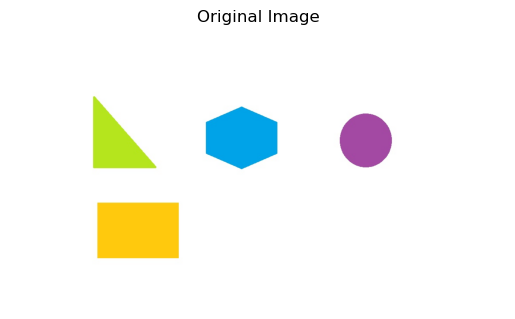

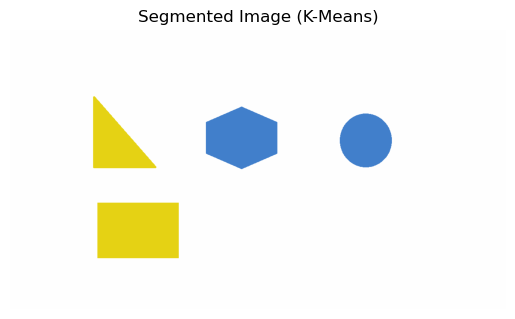

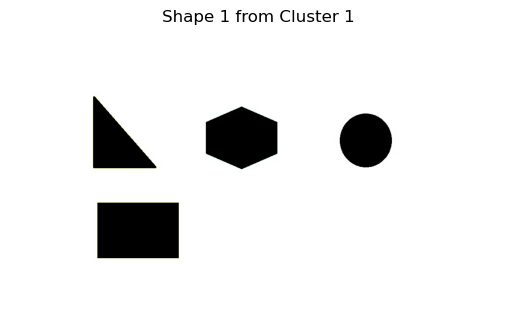

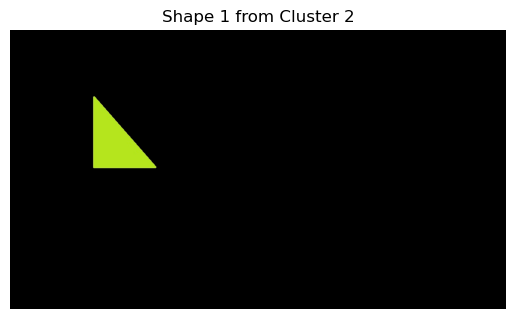

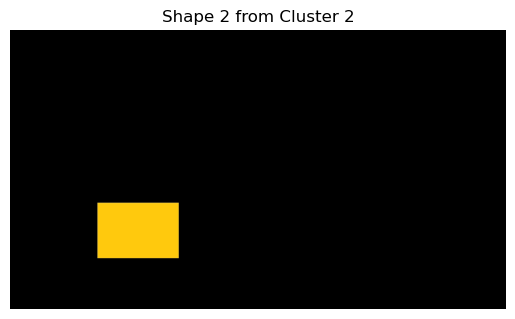

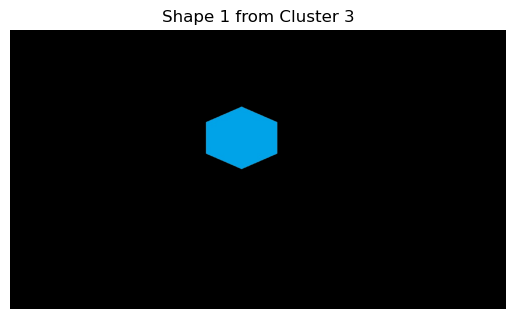

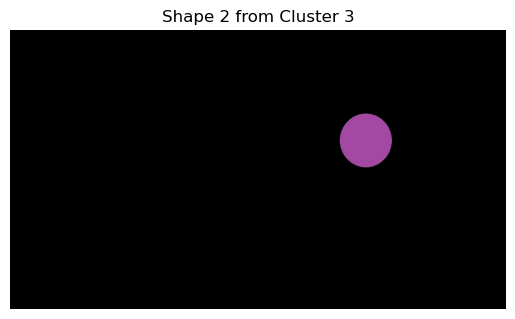

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
import numpy as np

# Load the image from file
image_path = r"C:\Users\acer\Downloads\a2.jpg"
img = cv2.imread(image_path)

# Convert BGR to RGB (since OpenCV loads images in BGR format)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape

x = img.reshape(-1, 3)

x.shape

# Apply K-Means clustering
K = 3  # Define K before using it
k_means = KMeans(n_clusters=K, n_init=10)  # Keeping n_init to suppress warnings
k_means.fit(x)

# Reshape labels to match image dimensions
labels = k_means.labels_.reshape(img.shape[:2])  # Define labels before using

segmented_image = k_means.cluster_centers_[k_means.labels_]
segmented_image = segmented_image.reshape(img.shape)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Show the segmented image
plt.imshow(segmented_image / 255)  # Normalize for display
plt.title("Segmented Image (K-Means)")
plt.axis("off")
plt.show()

# Extract and display each shape separately
for i in range(K):
    mask = (labels == i).astype(np.uint8)  # Convert to binary mask
    
    # Find connected components (shapes)
    num_labels, labeled_mask = cv2.connectedComponents(mask)
    
    for j in range(1, num_labels):  # Skip background (label 0)
        shape_mask = (labeled_mask == j).astype(np.uint8) * 255  # Isolate one shape
        
        # Extract the shape from the original image
        extracted_shape = np.zeros_like(img)
        extracted_shape[shape_mask == 255] = img[shape_mask == 255]

        # Display each extracted shape
        plt.imshow(extracted_shape)
        plt.title(f"Shape {j} from Cluster {i+1}")
        plt.axis("off")
        plt.show()


In [ ]:
# 5

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder

# Load the wine quality dataset
dataset_path = r"C:\Users\acer\Downloads\winequality-red.csv"


# Display the first few rows of the dataset
print(data.head())

# Mean, Variance, and Skewness
mean_values = data.mean()
variance_values = data.var()
skewness_values = data.skew()

# Calculate the entropy for each feature
def calculate_entropy(column):
    value_counts = column.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))  # Adding a small constant to avoid log(0)

entropy_values = data.apply(calculate_entropy)

# Combine results into a DataFrame
statistical_properties = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Skewness': skewness_values,
    'Entropy': entropy_values
})

print("\nStatistical Properties:")
print(statistical_properties)

# Analyzing Wine Quality
X = data.drop('quality', axis=1)
y = data['quality']

# Feature importance using RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# Determine important feature
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Checking if high entropy indicates harder classification
high_entropy_features = entropy_values[entropy_values > 1].index.tolist()
print("\nHigh Entropy Features that may indicate harder classification:")
print(high_entropy_features)

# Dropping features with high variance (example threshold)
threshold_variance = 0.1
low_variance_features = variance_values[variance_values < threshold_variance].index.tolist()
X_reduced = X[low_variance_features]

print("\nFeatures after dropping high variance features:")
print(low_variance_features)

# Fit the model again on reduced features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = RandomForestClassifier()
model_reduced.fit(X_train_reduced, y_train)

# Check reduced model feature importances
importances_reduced = model_reduced.feature_importances_
importance_reduced_df = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance': importances_reduced
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance After Dropping High Variance Features:")
print(importance_reduced_df)

In [ ]:
# 5

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder

# Load the wine quality dataset
dataset_path = r"C:\Users\acer\Downloads\winequality-red.csv"


# Display the first few rows of the dataset
print(data.head())

# Mean, Variance, and Skewness
mean_values = data.mean()
variance_values = data.var()
skewness_values = data.skew()

# Calculate the entropy for each feature
def calculate_entropy(column):
    value_counts = column.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))  # Adding a small constant to avoid log(0)

entropy_values = data.apply(calculate_entropy)

# Combine results into a DataFrame
statistical_properties = pd.DataFrame({
    'Mean': mean_values,
    'Variance': variance_values,
    'Skewness': skewness_values,
    'Entropy': entropy_values
})

print("\nStatistical Properties:")
print(statistical_properties)

# Analyzing Wine Quality
X = data.drop('quality', axis=1)
y = data['quality']

# Feature importance using RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# Determine important feature
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Checking if high entropy indicates harder classification
high_entropy_features = entropy_values[entropy_values > 1].index.tolist()
print("\nHigh Entropy Features that may indicate harder classification:")
print(high_entropy_features)

# Dropping features with high variance (example threshold)
threshold_variance = 0.1
low_variance_features = variance_values[variance_values < threshold_variance].index.tolist()
X_reduced = X[low_variance_features]

print("\nFeatures after dropping high variance features:")
print(low_variance_features)

# Fit the model again on reduced features
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model_reduced = RandomForestClassifier()
model_reduced.fit(X_train_reduced, y_train)

# Check reduced model feature importances
importances_reduced = model_reduced.feature_importances_
importance_reduced_df = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance': importances_reduced
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance After Dropping High Variance Features:")
print(importance_reduced_df)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew


dataset_path = r"C:\Users\acer\Downloads\winequality-red.csv"

# Define the function that calculates mean, variance, skewness, and entropy
def calculate_statistics(df):
    # Mean of each column
    mean_values = df.mean()

    # Variance of each column
    variance_values = df.var()

    # Skewness of each column
    skewness_values = df.apply(skew)

    # Entropy of the entire dataset
    def calculate_entropy(df):
        entropy = 0
        for column in df.columns:
            value_counts = df[column].value_counts()
            probabilities = value_counts / len(df)
            entropy_column = -np.sum(probabilities * np.log2(probabilities))
            entropy += entropy_column
        return entropy

    entropy_value = calculate_entropy(df)

    # Return all the calculated values as a dictionary
    return {
       "Mean": mean_values,
        "Variance": variance_values,
        "Skewness": skewness_values,
        "Entropy": entropy_value
    }





In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count words in ham and spam messages
ham_words = ' '.join(df[df['Class'] == 'ham']['Clean Message']).split()
spam_words = ' '.join(df[df['Class'] == 'spam']['Clean Message']).split()

ham_word_count = Counter(ham_words)
spam_word_count = Counter(spam_words)

# Get the most common words
ham_common = ham_word_count.most_common(20)
spam_common = spam_word_count.most_common(20)

# Plotting
ham_df = pd.DataFrame(ham_common, columns=['Word', 'Count'])
spam_df = pd.DataFrame(spam_common, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ham_df.plot.bar(x='Word', y='Count', legend=False, title='Most Common Words in Ham Messages', ax=plt.gca())
plt.subplot(1, 2, 2)
spam_df.plot.bar(x='Word', y='Count', legend=False, title='Most Common Words in Spam Messages', ax=plt.gca())
plt.show()
from collections import Counter
import matplotlib.pyplot as plt

# Count words in ham and spam messages
ham_words = ' '.join(df[df['Class'] == 'ham']['Clean Message']).split()
spam_words = ' '.join(df[df['Class'] == 'spam']['Clean Message']).split()

ham_word_count = Counter(ham_words)
spam_word_count = Counter(spam_words)

# Get the most common words
ham_common = ham_word_count.most_common(20)
spam_common = spam_word_count.most_common(20)

# Plotting
ham_df = pd.DataFrame(ham_common, columns=['Word', 'Count'])
spam_df = pd.DataFrame(spam_common, columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ham_df.plot.bar(x='Word', y='Count', legend=False, title='Most Common Words in Ham Messages', ax=plt.gca())
plt.subplot(1, 2, 2)
spam_df.plot.bar(x='Word', y='Count', legend=False, title='Most Common Words in Spam Messages', ax=plt.gca())
plt.show()
# Calculate average lengths
avg_ham_length = df[df['Class'] == 'ham']['Length'].mean()
avg_spam_length = df[df['Class'] == 'spam']['Length'].mean()

print(f'Average length of ham messages: {avg_ham_length}')
print(f'Average length of spam messages: {avg_spam_length}')

# Plotting the length distribution
df.hist(column='Length', by='Class', bins=30, color='black', figsize=(10, 5))
plt.title('Length Distribution of SMS Messages')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Tokenize and tag POS
df['Tokens'] = df['Clean Message'].apply(word_tokenize)
df['POS'] = df['Tokens'].apply(pos_tag)

# Flatten the POS tags for analysis
pos_counts = Counter(tag for sublist in df['POS'] for _, tag in sublist)

# Convert to DataFrame for plotting
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count'])

# Plotting POS distribution
pos_df.plot.bar(x='POS Tag', y='Count', legend=False, title='Part-of-Speech Distribution', figsize=(10, 5))
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.show()

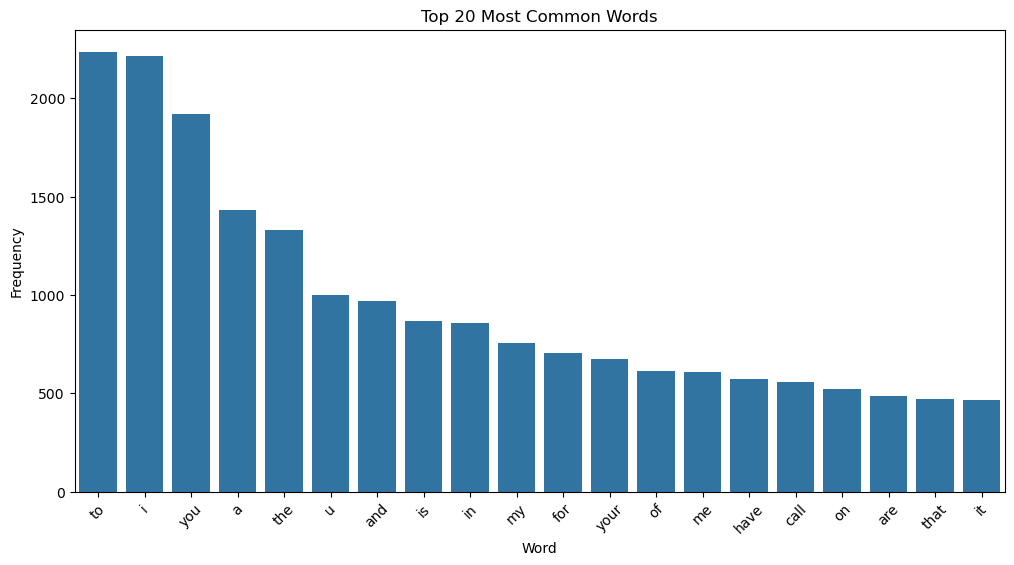

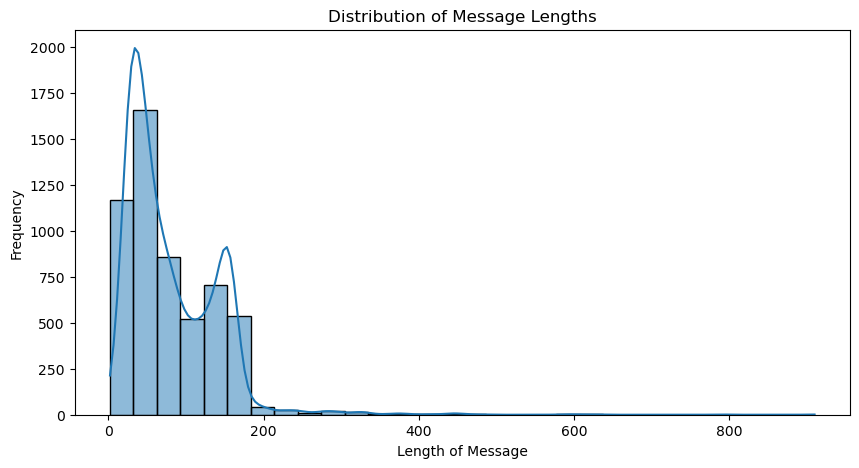

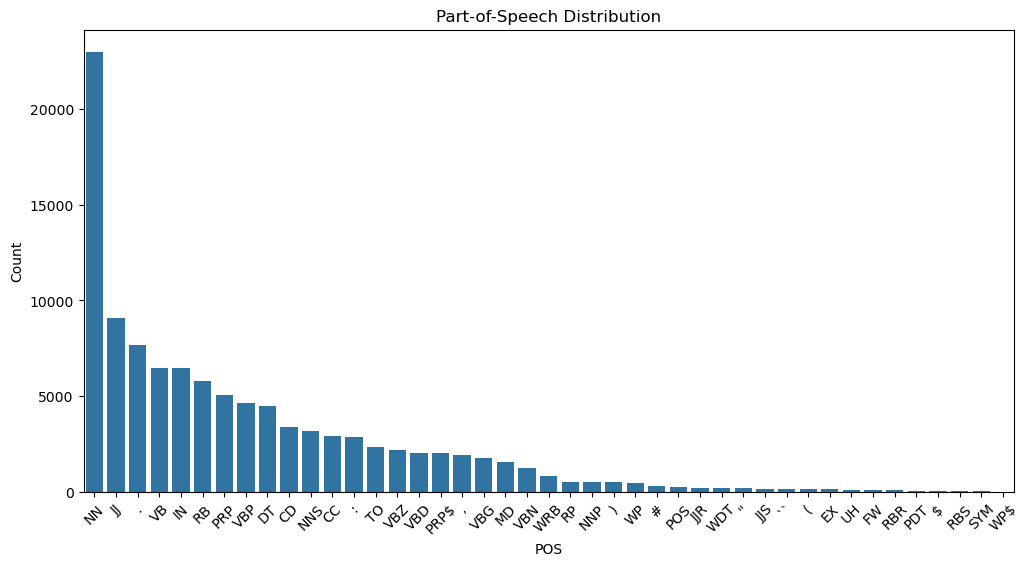

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize, pos_tag
from collections import Counter

# Load the dataset
df = pd.read_csv(r"C:\Users\acer\Downloads\sms+spam+collection\spam.csv", sep='\t', names=['Class', 'SMS Message'])

# Data Cleaning
df['Clean Message'] = df['SMS Message'].str.replace(r'\d+', '')  # Remove numbers
df['Clean Message'] = df['Clean Message'].str.replace(r'[^\w\s]', '')  # Remove punctuation
df['Clean Message'] = df['Clean Message'].str.lower()  # Convert to lowercase

# Tokenization
df['Tokens'] = df['Clean Message'].apply(word_tokenize)

# Sentence Length Analysis
df['Length'] = df['Clean Message'].apply(len)

# Word Frequency Analysis
word_freq = Counter(" ".join(df['Clean Message']).split()).most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Part-of-Speech Tagging
df['POS'] = df['Tokens'].apply(pos_tag)
pos_counts = Counter([pos for sublist in df['POS'] for _, pos in sublist]).most_common()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


# Sentence Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

# POS Distribution
pos_df = pd.DataFrame(pos_counts, columns=['POS', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='POS', y='Count', data=pos_df)
plt.title('Part-of-Speech Distribution')
plt.xticks(rotation=45)
plt.show()

In [41]:
SPAMSMS 6

SyntaxError: invalid syntax (3833004387.py, line 1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer  
from nltk.stem import PorterStemmer
nltk.download('wordnet')

In [ ]:
data = pd.read_csv(r"C:\Users\acer\Downloads\sms+spam+collection\spam.csv",  sep = "\t", header = None)
data.rename(columns =  {0:'Category', 1:"SMS Text"}, inplace = True)  # rename columns name
data

In [ ]:
data.describe()

In [ ]:
# Calculate the percentage of emails that are not spam and spam
not_spam_percentage = round(data['Category'].value_counts().iloc[0] / len(data) * 100, 2)
spam_percentage = round(data['Category'].value_counts().iloc[1] / len(data) * 100, 2)

# Print the results
print(f"Email Not Spam : {not_spam_percentage} %")
print(f"Spam Email : {spam_percentage} %")

In [ ]:
data['num_words'] = data['SMS Text'].apply(lambda x : len(nltk.word_tokenize(x)))
data.head()

In [ ]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    #text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [ ]:
data['Clean SMS'] = data['SMS Text'].apply(clean_text)

In [ ]:
data.columns

In [ ]:
data.head(10)

In [ ]:
data.groupby('Category').describe()

In [ ]:
data['Length'] = data['Clean SMS'].apply(len)
data[0:10]

In [ ]:
spam_word = []
for msg in data[data['Category'] == 'spam']['Clean SMS'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [ ]:
len(spam_word)


In [ ]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');
     

In [ ]:

ham_word = []
for msg in data[data['Category'] == 'ham']['Clean SMS'].tolist():
  for word in msg.split():
    ham_word.append(word)

In [ ]:
len(ham_word)

In [ ]:
# Create a list of tokens after messages have been cleaned
data['Tokens'] = data['Clean SMS'].map(lambda text: nltk.tokenize.word_tokenize(text))
 
data['Clean SMS'] = data['Clean SMS'].apply(len)
data.head()

In [ ]:
data = Counter('Clean SMS')

#to extract the most common words
data.most_common()

In [ ]:

ham_count = Counter(" ".join(data[data['Class']=='ham']["Clean SMS"]).split()).most_common(20)
ham_count_df = pd.DataFrame.from_dict(ham_count)
ham_count_df = ham_count_df.rename(columns={0: "words in ham", 1 : "count"})

spam_count = Counter(" ".join(data[data['Class']=='spam']["Clean SMS"]).split()).most_common(20)
spam_count_df = pd.DataFrame.from_dict(spam_count)
spam_count_df = spam_count_df.rename(columns={0: "words in spam", 1 : "count_"})

In [ ]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [ ]:
lemma = WordNetLemmatizer()


In [ ]:
l = []
for i in range(len(lst)):
  words = [lemma.lemmatize(word) for word in lst[i] if word not in set(stopwords.words('english'))]
  words = ' '.join(words)
  l.append(words)